In [147]:
import matplotlib.pyplot as plt
import re
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

In [50]:
gun_data = pd.read_csv('./Data/gun-violence-data_01-2013_03-2018.csv')

In [51]:
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [52]:
list_of_keywords=['url','source','notes','address','incident_id']

gun_data = gun_data[gun_data.columns.drop(list(gun_data.filter(regex='|'.join(list_of_keywords))))]
gun_data.head()

,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,...,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [90]:
len(gun_data.incident_characteristics)

239677

In [91]:
gun_data['incident_characteristics'].isnull().sum()

326

In [92]:


#copy gun data
gun_data_modified = gun_data.copy()

In [93]:
#Count number of NAs in incident characteristics column
print(gun_data_modified.incident_characteristics.isna().sum()/len(gun_data_modified.incident_characteristics)*100)

0.13601638872315658


We are not going to use these rows to calculate the most common strings in the incidents column.

In [94]:



#drop any rows with na in the 
gun_data_modified.incident_characteristics.dropna(inplace=True)

#Split the data on || to create a series of lists
gun_data_modified.incident_characteristics = gun_data_modified.incident_characteristics.apply(lambda row: row.split('||'))

#sets incidents to list
incidents = gun_data_modified['incident_characteristics'].tolist()

#drops nan values from list
incidents = [x for x in incidents if str(x) != 'nan']

#converts the list of lists to a list
incidents = [item for sublist in incidents for item in sublist]
#unique_incidents = set(incidents)
#unique_incidents = list(unique_incidents)

#get the top 10 most common strings in the list
top_incidents = Counter(incidents).most_common(10)

In [144]:
gun_data_updated = gun_data_modified.copy()
print(gun_data_updated.shape)

for col in top_incidents:
    gun_data_updated['incident_'+col[0]]=np.zeros(len(gun_data_updated))
    
gun_data_updated['incident_other']=np.zeros(len(gun_data_updated))

print(gun_data_updated.shape)

(239677, 22)
(239677, 33)


Incident columns

In [ ]:
incident_col = gun_data_updated.filter(regex=(r'incident_[A-Z]')).columns

gun_data_updated.incident_characteristics.dropna(inplace=True)

for index,row in enumerate(gun_data_updated.incident_characteristics):
    check = 0
    pattern = '|'.join(row)
    for n,col in enumerate(incident_col):
        if re.split('incident_',col)[1] in pattern:
            gun_data_updated[col,index]=1
            check = 1
        elif n==len(incident_col)-1 and check==0:
            gun_data_updated['incident_other',index]=1
            #print('incident_other')
            

print(gun_data_updated.sample(20))

In [ ]:
print(gun_data_updated.sample(20))

In [118]:
X = gun_data.loc[:,['latitude','longitude']]

In [126]:
X.dropna(inplace=True)
X_val = X.values

In [127]:
wcss = []
for i in range(1,25):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,
                    n_init=10,random_state=123)
    kmeans.fit(X_val)
    wcss.append(kmeans.inertia_)

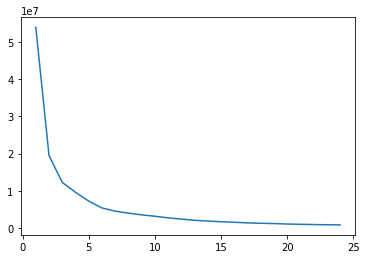

In [128]:
plt.plot(range(1,25),wcss)

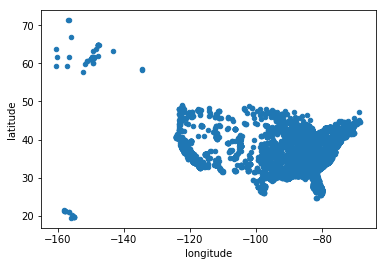

In [124]:
X.sample(10000).plot.scatter(x='longitude',y='latitude');